In [1]:
# Import Packages

import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import mapclassify
import plotly.express as px
from shapely.geometry import Point

In [2]:
# Reading CRIME POINTS file

crimepoints = pd.read_csv('crimepoints.csv')
crimepoints.head(5)


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,59263678a3b555ff49b56c8139a50ae7d726319ad11696...,2021-03,City of London Police,City of London Police,-0.126375,51.531512,On or near Shopping Area,E01000953,Camden 022B,Violence and sexual offences,Status update unavailable,NaN
1,b76e47ab9e47e04e113d39a07e5d98ebe26573e2e59c87...,2021-03,City of London Police,City of London Police,-0.109582,51.522017,On or near Clerkenwell Road,E01000916,Camden 027B,Drugs,Status update unavailable,NaN
2,eb03022d768846e0205cb1085ac26f657d522b5d391779...,2021-03,City of London Police,City of London Police,-0.109582,51.522017,On or near Clerkenwell Road,E01000916,Camden 027B,Possession of weapons,Status update unavailable,NaN
3,cb8731ed3a2baf3ea4bb652a2049b3bc407dbbf73d19ee...,2021-03,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Burglary,Investigation complete; no suspect identified,NaN
4,51e6cadbbe32c9edcd77d9be18ab0bf0e133e07d026b54...,2021-03,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,Investigation complete; no suspect identified,NaN


<Axes: >

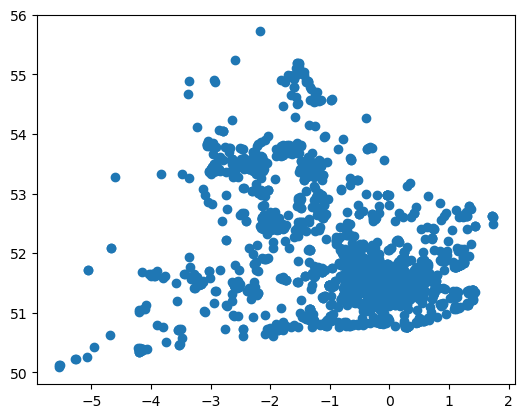

In [3]:
# Identifying points

# Create a GeoDataFrame from the DataFrame
crimepoints = gpd.GeoDataFrame(crimepoints, geometry=gpd.points_from_xy(crimepoints['Longitude'], crimepoints['Latitude']))

# Plot the points. It is noticed that the points dataset covers all the UK.
crimepoints.plot()


In [4]:
# Reading in the 2021 dataset from Project 1 (former CrimeMap_2021)

London_Map_2021 = gpd.read_file('London_Map_2021.geojson')

# Selection of relevant columns
London_Map_2021 = London_Map_2021 [['LSOA Code', 'OA21CD','LSOA21NM','BNG_E','BNG_N','LAT','LONG','GlobalID','2021 Crime/1000 people','2021 Population','2021 Non UK Percentage','Elementary Sum 2021','Elementary Prop 2021','geometry']]
London_Map_2021.head(5)

,LSOA Code,OA21CD,LSOA21NM,BNG_E,BNG_N,LAT,LONG,GlobalID,2021 Crime/1000 people,2021 Population,2021 Non UK Percentage,Elementary Sum 2021,Elementary Prop 2021,geometry
0,E01000001,E00000001,City of London 001A,532250,181864,51.5202,-0.095230,09af0f57-ef7c-448b-b0ba-093649a86e70,121.109608,1478,0.408660,34,0.039171,"POLYGON ((532275.938 181637.750, 532272.750 18..."
1,E01000002,E00000018,City of London 001B,532397,181793,51.5195,-0.093140,b9862ded-2d5e-4f2f-9009-951bb8f6ecae,176.555716,1382,0.450796,15,0.017143,"POLYGON ((532624.323 181842.310, 532626.495 18..."
2,E01000003,E00000010,City of London 001C,532092,182114,51.5225,-0.097410,eee105a5-6df7-41b7-ba8e-d77deb24493f,50.216987,1613,0.429014,95,0.094810,"POLYGON ((532236.500 181891.563, 532224.624 18..."
3,E01000005,E00000029,City of London 001E,533581,181249,51.5144,-0.076290,a5689649-6253-4357-b84c-9fe07fedf0c6,463.570128,1098,0.485428,172,0.348178,"POLYGON ((533615.622 181406.023, 533619.062 18..."
4,E01000006,E00000049,Barking and Dagenham 016A,544816,184464,51.5405,0.086831,148eca51-307b-43e3-a746-8ded9845dabf,51.031488,1842,0.517915,311,0.351016,"POLYGON ((545183.927 184145.062, 545179.170 18..."


In [5]:
# Check the CRS of the crimepoints dataset
print(crimepoints.crs)
print(London_Map_2021.crs)

# Changing the crs of points from non to EPSG:4326 (latitud and longitud)
crimepoints.crs = 'EPSG:4326'

print(crimepoints.crs)


None
EPSG:27700
EPSG:4326


In [6]:
# Reproject points to EPSG 27700. This had to be done so that the points align with the LSOA polygons.
crimepoints_reprojected = crimepoints.to_crs(London_Map_2021.crs)

In [7]:
# As I mentiond before the points were for all UK, so I performed a spatial join to determine which LSOA each point belongs to
London_Crime_Points = gpd.sjoin(crimepoints_reprojected, London_Map_2021, op='within')
London_Crime_Points = London_Crime_Points.reset_index(drop=True)

# This reduces the dataset to only the geometry of the points. This might keep it simple to calculate distances.
Crime_Points_GeomOnly = London_Crime_Points[['geometry']]


c:\Users\FSzeliga\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [8]:
London_Crime_Points.head(5)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,...,BNG_E,BNG_N,LAT,LONG,GlobalID,2021 Crime/1000 people,2021 Population,2021 Non UK Percentage,Elementary Sum 2021,Elementary Prop 2021
0,59263678a3b555ff49b56c8139a50ae7d726319ad11696...,2021-03,City of London Police,City of London Police,-0.126375,51.531512,On or near Shopping Area,E01000953,Camden 022B,Violence and sexual offences,...,530110,183405,51.5346,-0.12548,83efcc5c-f476-4407-ab32-44af3d213115,184.008201,1951,0.583803,102,0.136913
1,NaN,2021-03,Metropolitan Police Service,Metropolitan Police Service,-0.126375,51.531512,On or near Shopping Area,E01000953,Camden 022B,Anti-social behaviour,...,530110,183405,51.5346,-0.12548,83efcc5c-f476-4407-ab32-44af3d213115,184.008201,1951,0.583803,102,0.136913
2,NaN,2021-03,Metropolitan Police Service,Metropolitan Police Service,-0.126699,51.533442,On or near Goods Way,E01000953,Camden 022B,Anti-social behaviour,...,530110,183405,51.5346,-0.12548,83efcc5c-f476-4407-ab32-44af3d213115,184.008201,1951,0.583803,102,0.136913
3,NaN,2021-03,Metropolitan Police Service,Metropolitan Police Service,-0.122678,51.535167,On or near Petrol Station,E01000953,Camden 022B,Anti-social behaviour,...,530110,183405,51.5346,-0.12548,83efcc5c-f476-4407-ab32-44af3d213115,184.008201,1951,0.583803,102,0.136913
4,032c65a78e935a164f4dc13877de2364976669a77cbc82...,2021-03,Metropolitan Police Service,Metropolitan Police Service,-0.123643,51.530264,On or near Pedestrian Subway,E01000953,Camden 022B,Bicycle theft,...,530110,183405,51.5346,-0.12548,83efcc5c-f476-4407-ab32-44af3d213115,184.008201,1951,0.583803,102,0.136913


In [9]:
Crime_Points_GeomOnly.head(5)

,geometry
0,POINT (530058.981 183063.966)
1,POINT (530058.981 183063.966)
2,POINT (530031.014 183278.014)
3,POINT (530304.970 183476.989)
4,POINT (530252.028 182930.040)


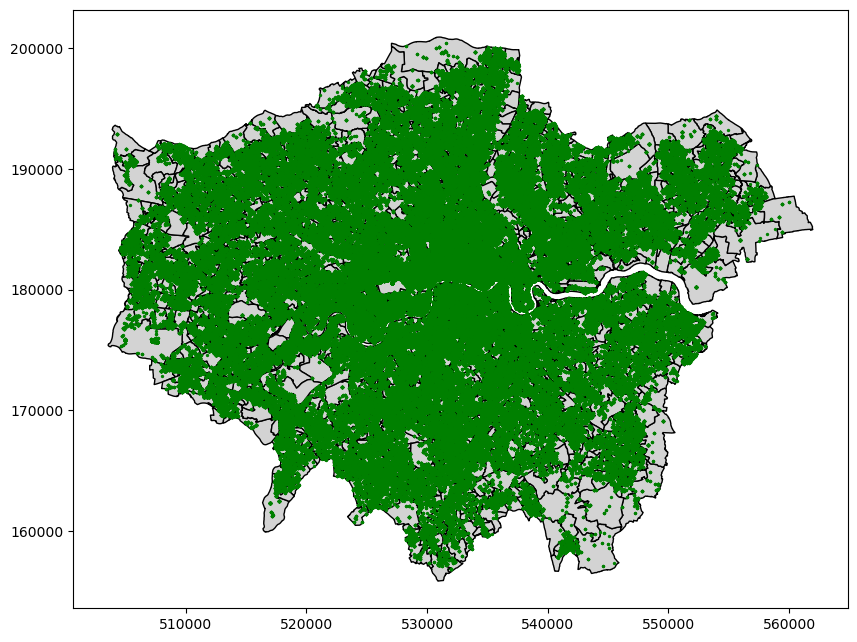

In [10]:
# Map to show that polygons and points are in the right format. THIS IS JUST A CHECK. 
fig, ax = plt.subplots(figsize=(10, 10))
London_Map_2021.plot(ax=ax, color='lightgrey', edgecolor='black')
Crime_Points_GeomOnly.plot(ax=ax, color='green',markersize=2)
plt.show()
